In [ ]:
import socket, struct, sys
import numpy as np
import pickle
from google.colab import drive

def loaddata(file_path):
    """Function to load the training and the test dataset from Google Drive"""

    # Mount Google Drive
    drive.mount('/content/gdrive')

    file_path = '/content/gdrive/MyDrive/' + file_path

    with open(file_path, 'rb') as file:
        xdata, ydata, xdataT, ydataT = pickle.load(file, encoding='latin1')

    print("xdata:")
    print(xdata)
    print("\nydata:")
    print(ydata)
    print("\nxdataT:")
    print(xdataT)
    print("\nydataT:")
    print(ydataT)


    # return the training and the test dataset
    return xdata, ydata, xdataT, ydataT

if __name__ == "__main__":
    # Replace 'your_file_path' with the actual file path on Google Drive
    file_path = 'flowdata.pickle'
    loaddata(file_path)


Mounted at /content/gdrive
xdata:
[[1.026539e+00 0.000000e+00 1.577000e+03 ... 4.000000e+00 2.760000e+02
  6.110500e+04]
 [1.009595e+00 0.000000e+00 1.577000e+03 ... 4.000000e+00 2.760000e+02
  6.110500e+04]
 [3.056586e+00 0.000000e+00 4.768000e+03 ... 3.000000e+00 1.820000e+02
  3.400000e+01]
 ...
 [1.031700e-01 1.000000e+00 2.079000e+03 ... 2.000000e+00 3.740000e+02
  2.190507e+06]
 [1.004100e-01 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.320000e+02
  2.190507e+06]
 [1.031450e-01 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.700000e+02
  2.190507e+06]]

ydata:
[0 0 0 ... 1 1 1]

xdataT:
[[7.440000e-04 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.110000e+02
  2.190507e+06]
 [1.277000e-03 1.000000e+00 6.521800e+04 ... 2.000000e+00 1.350000e+02
  2.190507e+06]
 [2.650000e-04 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.060000e+02
  2.190507e+06]
 ...
 [7.279500e-02 1.000000e+00 2.077000e+03 ... 2.000000e+00 2.990000e+02
  2.190507e+06]
 [0.000000e+00 1.000000e+00 2.077000e+03 ... 1.000

# **SVM Model**

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
xdata:
[[1.026539e+00 0.000000e+00 1.577000e+03 ... 4.000000e+00 2.760000e+02
  6.110500e+04]
 [1.009595e+00 0.000000e+00 1.577000e+03 ... 4.000000e+00 2.760000e+02
  6.110500e+04]
 [3.056586e+00 0.000000e+00 4.768000e+03 ... 3.000000e+00 1.820000e+02
  3.400000e+01]
 ...
 [1.031700e-01 1.000000e+00 2.079000e+03 ... 2.000000e+00 3.740000e+02
  2.190507e+06]
 [1.004100e-01 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.320000e+02
  2.190507e+06]
 [1.031450e-01 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.700000e+02
  2.190507e+06]]

ydata:
[0 0 0 ... 1 1 1]

xdataT:
[[7.440000e-04 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.110000e+02
  2.190507e+06]
 [1.277000e-03 1.000000e+00 6.521800e+04 ... 2.000000e+00 1.350000e+02
  2.190507e+06]
 [2.650000e-04 1.000000e+00 2.079000e+03 ... 2.000000e+00 2.060000e+02
  2.190507e+06]
 ...
 [7.279500e-02 1.000000e+00 2.077

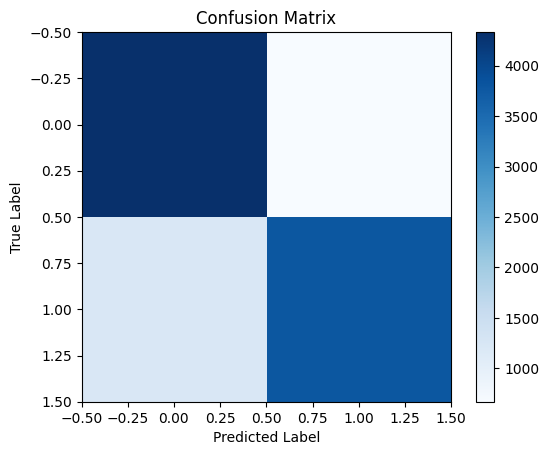

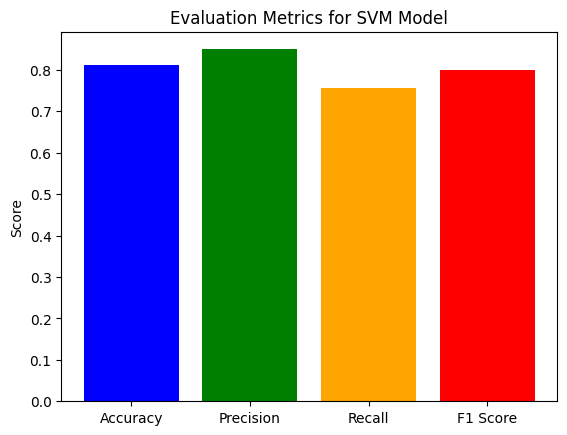

In [ ]:
import numpy as np
import pickle
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
X, Y, XT, YT = loaddata('flowdata.pickle')

class SVMModel:
    """Support Vector Machine Model"""
    def __init__(self, X, Y, XT, YT):
        self.X = X
        self.Y = Y
        self.XT = XT
        self.YT = YT
        self.accuracy = None  # Initialize accuracy attribute
        self.precision = None
        self.recall = None
        self.f1_score = None
        self.conf_matrix = None

    def train(self):
        svModel = SVC(kernel='rbf')
        svModel.fit(self.X, self.Y)
        sd = svModel.predict(self.XT)

        # Evaluate metrics
        self.accuracy = accuracy_score(self.YT, sd)
        self.precision = precision_score(self.YT, sd)
        self.recall = recall_score(self.YT, sd)
        self.f1_score = f1_score(self.YT, sd)
        self.conf_matrix = confusion_matrix(self.YT, sd)

        # Print metrics
        print("Accuracy of SVM Model: %.2f" % self.accuracy + ' %')
        print("Precision: %.2f" % self.precision)
        print("Recall: %.2f" % self.recall)
        print("F1 Score: %.2f" % self.f1_score)
        print("Confusion Matrix:")
        print(self.conf_matrix)
        print('=' * 100)

        # Plot confusion matrix
        plt.imshow(self.conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Plot bar graph for metrics
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        metrics_values = [self.accuracy, self.precision, self.recall, self.f1_score]

        plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
        plt.title('Evaluation Metrics for SVM Model')
        plt.ylabel('Score')
        plt.show()

# Usage example for SVMModel
svm_model = SVMModel(X, Y, XT, YT)
svm_model.train()


# **Logistic Regression**

Accuracy of Logistic Regression Model: 0.97 %
Precision: 0.94
Recall: 1.00
F1 Score: 0.97
Confusion Matrix:
[[4704  297]
 [   6 4995]]


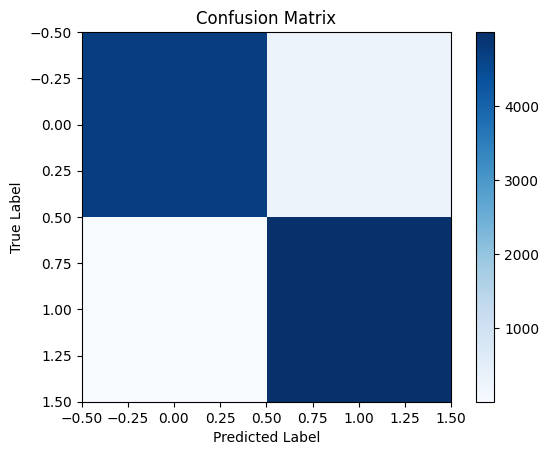

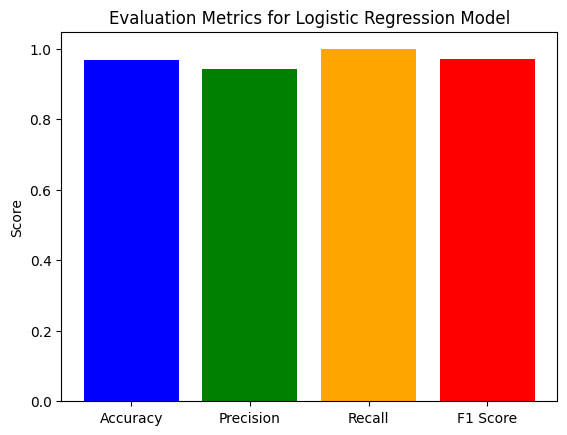

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

class LogModel:
    """Logistic Regression Model"""
    def __init__(self, X, Y, XT, YT, accLabel=None):
        self.X = X
        self.Y = Y
        self.XT = XT
        self.YT = YT
        self.accuracy = None
        self.precision = None
        self.recall = None
        self.f1_score = None
        self.conf_matrix = None
        self.accLabel = accLabel

    def preprocess_data(self):
        """Standardize the data"""
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)
        self.XT = scaler.transform(self.XT)

    def train(self):
        """Train the Logistic Regression model"""
        logModel = LogisticRegression(C=10000)
        logModel.fit(self.X, self.Y)
        sd = logModel.predict(self.XT)

        # Evaluate metrics
        self.accuracy = accuracy_score(self.YT, sd)
        self.precision = precision_score(self.YT, sd)
        self.recall = recall_score(self.YT, sd)
        self.f1_score = f1_score(self.YT, sd)
        self.conf_matrix = confusion_matrix(self.YT, sd)

        # Print metrics
        print("Accuracy of Logistic Regression Model: %.2f" % self.accuracy + ' %')
        print("Precision: %.2f" % self.precision)
        print("Recall: %.2f" % self.recall)
        print("F1 Score: %.2f" % self.f1_score)
        print("Confusion Matrix:")
        print(self.conf_matrix)
        print('=' * 100)

        # Plot confusion matrix
        plt.imshow(self.conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Plot bar graph for metrics
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        metrics_values = [self.accuracy, self.precision, self.recall, self.f1_score]

        plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
        plt.title('Evaluation Metrics for Logistic Regression Model')
        plt.ylabel('Score')
        plt.show()

        # Update the label if provided
        if self.accLabel:
            self.accLabel.set("Accuracy of Logistic Regression Model: %.2f" % (self.accuracy) + ' %')

# Usage example for LogModel
log_model = LogModel(X, Y, XT, YT)
log_model.preprocess_data()
log_model.train()


# **Decision Tree**

Accuracy of Decision Tree Model: 1.00 %
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[4999    2]
 [   0 5001]]


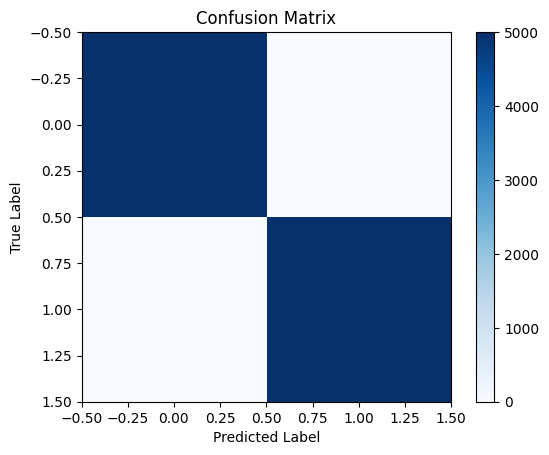

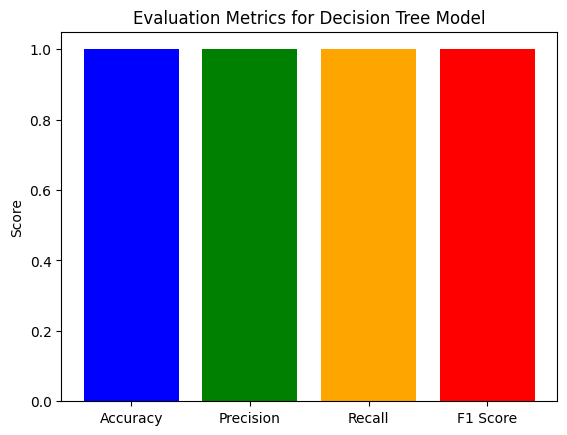

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

class DTModel:
    """Decision Tree Model"""
    def __init__(self, X, Y, XT, YT, accLabel=None):
        self.X = X
        self.Y = Y
        self.XT = XT
        self.YT = YT
        self.accuracy = None
        self.precision = None
        self.recall = None
        self.f1_score = None
        self.conf_matrix = None
        self.accLabel = accLabel

    def preprocess_data(self):
        """Standardize the data"""
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)
        self.XT = scaler.transform(self.XT)

    def train(self):
        """Train the Decision Tree model"""
        dtModel = DecisionTreeClassifier()
        dtModel.fit(self.X, self.Y)
        sd = dtModel.predict(self.XT)

        # Evaluate metrics
        self.accuracy = accuracy_score(self.YT, sd)
        self.precision = precision_score(self.YT, sd)
        self.recall = recall_score(self.YT, sd)
        self.f1_score = f1_score(self.YT, sd)
        self.conf_matrix = confusion_matrix(self.YT, sd)

        # Print metrics
        print("Accuracy of Decision Tree Model: %.2f" % self.accuracy + ' %')
        print("Precision: %.2f" % self.precision)
        print("Recall: %.2f" % self.recall)
        print("F1 Score: %.2f" % self.f1_score)
        print("Confusion Matrix:")
        print(self.conf_matrix)
        print('=' * 100)

        # Plot confusion matrix
        plt.imshow(self.conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Plot bar graph for metrics
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        metrics_values = [self.accuracy, self.precision, self.recall, self.f1_score]

        plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
        plt.title('Evaluation Metrics for Decision Tree Model')
        plt.ylabel('Score')
        plt.show()

        # Update the label if provided
        if self.accLabel:
            self.accLabel.set("Accuracy of Decision Tree Model: %.2f" % (self.accuracy) + ' %')

# Usage example for DTModel
dt_model = DTModel(X, Y, XT, YT)
dt_model.preprocess_data()
dt_model.train()


# **Naive Bayes**

Accuracy of Naive Bayes Model: 0.98 %
Precision: 0.97
Recall: 1.00
F1 Score: 0.98
Confusion Matrix:
[[4823  178]
 [   7 4994]]


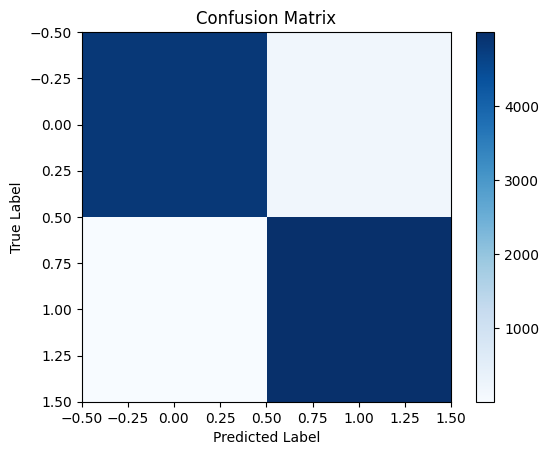

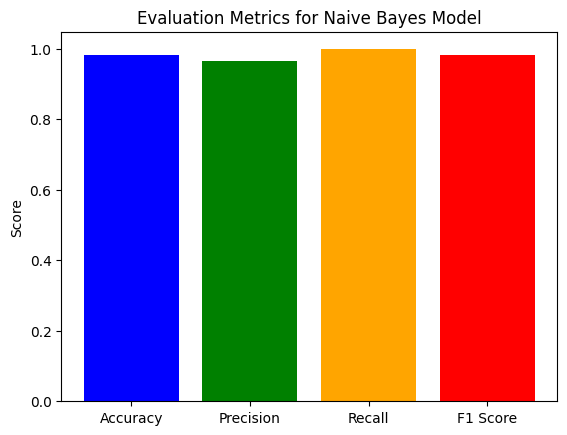

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

class NBModel:
    """Gaussian Naive Bayes Model"""
    def __init__(self, X, Y, XT, YT, accLabel=None):
        self.X = X
        self.Y = Y
        self.XT = XT
        self.YT = YT
        self.accuracy = None
        self.precision = None
        self.recall = None
        self.f1_score = None
        self.conf_matrix = None
        self.accLabel = accLabel

    def preprocess_data(self):
        """Standardize the data"""
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)
        self.XT = scaler.transform(self.XT)

    def train(self):
        """Train the Naive Bayes model"""
        nbModel = GaussianNB()
        nbModel.fit(self.X, self.Y)
        sd = nbModel.predict(self.XT)

        # Evaluate metrics
        self.accuracy = accuracy_score(self.YT, sd)
        self.precision = precision_score(self.YT, sd)
        self.recall = recall_score(self.YT, sd)
        self.f1_score = f1_score(self.YT, sd)
        self.conf_matrix = confusion_matrix(self.YT, sd)

        # Print metrics
        print("Accuracy of Naive Bayes Model: %.2f" % self.accuracy + ' %')
        print("Precision: %.2f" % self.precision)
        print("Recall: %.2f" % self.recall)
        print("F1 Score: %.2f" % self.f1_score)
        print("Confusion Matrix:")
        print(self.conf_matrix)
        print('=' * 100)

        # Plot confusion matrix
        plt.imshow(self.conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Plot bar graph for metrics
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        metrics_values = [self.accuracy, self.precision, self.recall, self.f1_score]

        plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
        plt.title('Evaluation Metrics for Naive Bayes Model')
        plt.ylabel('Score')
        plt.show()

        # Update the label if provided
        if self.accLabel:
            self.accLabel.set("Accuracy of Naive Bayes Model: %.2f" % (self.accuracy) + ' %')

# Usage example for NBModel
nb_model = NBModel(X, Y, XT, YT)
nb_model.preprocess_data()
nb_model.train()


# **KNN Model**

Accuracy of KNN Model: 0.98 %
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Confusion Matrix:
[[4907   94]
 [  87 4914]]


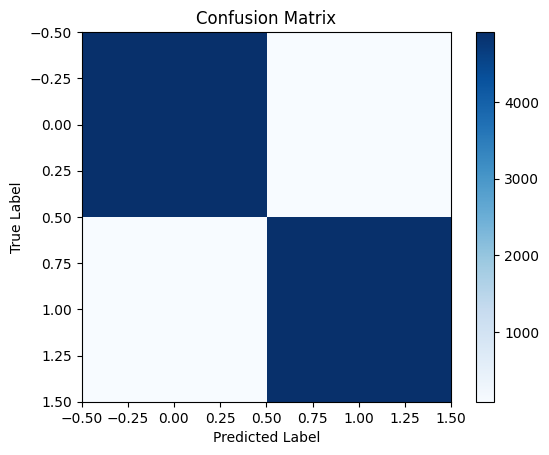

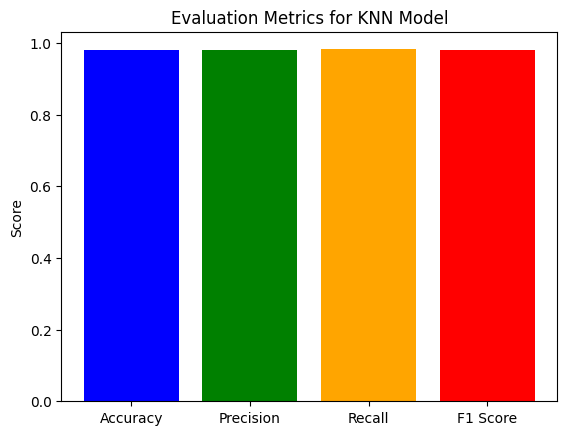

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

class KNNModel:
    """K Nearest Neighbours Model"""
    def __init__(self, X, Y, XT, YT, accLabel=None):
        self.X = X
        self.Y = Y
        self.XT = XT
        self.YT = YT
        self.accuracy = None
        self.precision = None
        self.recall = None
        self.f1_score = None
        self.conf_matrix = None
        self.accLabel = accLabel

    def preprocess_data(self):
        """Standardize the data"""
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)
        self.XT = scaler.transform(self.XT)

    def train(self):
        """Train the KNN model"""
        knnModel = KNeighborsClassifier()
        knnModel.fit(self.X, self.Y)
        sd = knnModel.predict(self.XT)

        # Evaluate metrics
        self.accuracy = accuracy_score(self.YT, sd)
        self.precision = precision_score(self.YT, sd)
        self.recall = recall_score(self.YT, sd)
        self.f1_score = f1_score(self.YT, sd)
        self.conf_matrix = confusion_matrix(self.YT, sd)

        # Print metrics
        print("Accuracy of KNN Model: %.2f" % self.accuracy + ' %')
        print("Precision: %.2f" % self.precision)
        print("Recall: %.2f" % self.recall)
        print("F1 Score: %.2f" % self.f1_score)
        print("Confusion Matrix:")
        print(self.conf_matrix)
        print('=' * 100)

        # Plot confusion matrix
        plt.imshow(self.conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Plot bar graph for metrics
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        metrics_values = [self.accuracy, self.precision, self.recall, self.f1_score]

        plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
        plt.title('Evaluation Metrics for KNN Model')
        plt.ylabel('Score')
        plt.show()

        # Update the label if provided
        if self.accLabel:
            self.accLabel.set("Accuracy of KNN Model: %.2f" % (self.accuracy) + ' %')

# Usage example for KNNModel
knn_model = KNNModel(X, Y, XT, YT)
knn_model.preprocess_data()
knn_model.train()


# **ANN Model**

Epoch 1/200
401/401 [==============================] - 3s 2ms/step - loss: 0.1313
Epoch 2/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0514
Epoch 3/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0452
Epoch 4/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0403
Epoch 5/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0364
Epoch 6/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0332
Epoch 7/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0307
Epoch 8/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0287
Epoch 9/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0273
Epoch 10/200
401/401 [==============================] - 1s 2ms/step - loss: 0.0262
Epoch 11/200
401/401 [==============================] - 1s 3ms/step - loss: 0.0255
Epoch 12/200
401/401 [==============================] - 1s 3ms/step - loss: 0.0250
Epoch 13/200


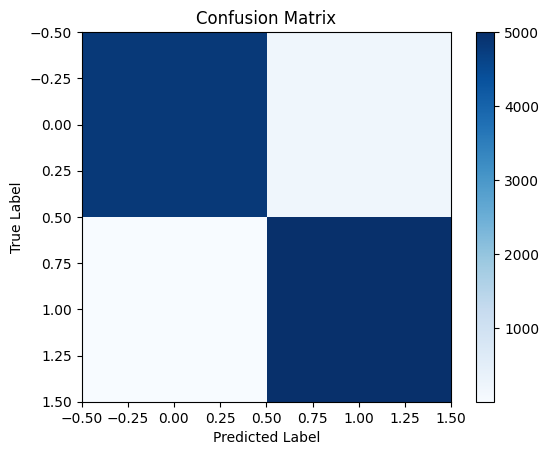

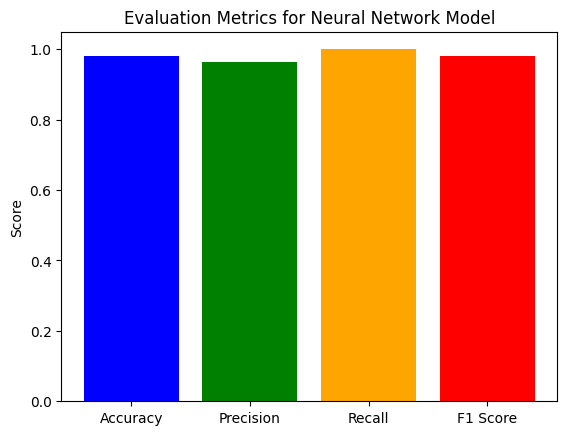

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD as LegacySGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

class ANNModel:
    """Neural Network Model"""
    def __init__(self, X, Y, XT, YT, accLabel=None):
        self.X = X
        self.Y = Y
        self.XT = XT
        self.YT = YT
        self.accuracy = None
        self.precision = None
        self.recall = None
        self.f1_score = None
        self.conf_matrix = None
        self.accLabel = accLabel

    def preprocess_data(self):
        """Standardize the data"""
        for i in range(9):
            self.X[:, i] = (self.X[:, i] - self.X[:, i].mean()) / (self.X[:, i].std())
            self.XT[:, i] = (self.XT[:, i] - self.XT[:, i].mean()) / (self.XT[:, i].std())

    def train(self):
        """Train the Neural Network model"""
        model = Sequential()
        model.add(Dense(10, input_dim=9, activation="sigmoid"))
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(1))
        legacy_sgd = LegacySGD(learning_rate=0.01, momentum=0.9, nesterov=True)
        model.compile(optimizer=legacy_sgd, loss='mse')
        model.fit(self.X, self.Y, epochs=200, batch_size=100)
        sd = model.predict(self.XT)
        sd = sd[:, 0]
        sdList = np.where(sd >= 0.5, 1, 0)


        # Evaluate metrics
        self.accuracy = accuracy_score(self.YT, sdList)
        self.precision = precision_score(self.YT, sdList)
        self.recall = recall_score(self.YT, sdList)
        self.f1_score = f1_score(self.YT, sdList)
        self.conf_matrix = confusion_matrix(self.YT, sdList)

        # Print metrics
        print("Accuracy of Neural Network Model: %.2f" % self.accuracy + ' %')
        print("Precision: %.2f" % self.precision)
        print("Recall: %.2f" % self.recall)
        print("F1 Score: %.2f" % self.f1_score)
        print("Confusion Matrix:")
        print(self.conf_matrix)
        print('=' * 100)

        # Plot confusion matrix
        plt.imshow(self.conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Plot bar graph for metrics
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        metrics_values = [self.accuracy, self.precision, self.recall, self.f1_score]

        plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
        plt.title('Evaluation Metrics for Neural Network Model')
        plt.ylabel('Score')
        plt.show()

        # Update the label if provided
        if self.accLabel:
            self.accLabel.set("Accuracy of Neural Network Model: %.2f" % (self.accuracy) + ' %')

# Usage example for ANNModel
ann_model = ANNModel(X, Y, XT, YT)
ann_model.preprocess_data()
ann_model.train()
